# Import libraries and data:

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib



df = pd.read_csv("../data/news_data_preprocessed_final.csv")

# Drop any rows that might have become NaN during saving/loading (sanity check)
df.dropna(subset=['clean_text', 'category_level_1'], inplace=True)

print(f"Data Loaded. Shape: {df.shape}")

Data Loaded. Shape: (10456, 2)


# Train/Test Split data:

In [4]:
X = df['clean_text']
y = df['category_level_1']


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y      # ensures that the distribution of categories is the same in both sets.
)

# Model Train:

In [5]:
model_pipeline = Pipeline([
    # Step 1: Convert text to numbers (TF-IDF)
    ('tfidf', TfidfVectorizer(max_features=5000)),

    # Step 2: The Classifier (Multinomial Naive Bayes)
    # MNB is efficient and works very well for text classification.
    ('clf', MultinomialNB())
])


print("⏳ Training the model...")
model_pipeline.fit(X_train, y_train)
print("✅ Model trained successfully!")

⏳ Training the model...
✅ Model trained successfully!


# Evaluate model:

In [6]:
print("⏳ Predicting on test data...")
y_pred = model_pipeline.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2%}")
print("-" * 60)

# Detailed Classification Report
# This shows Precision, Recall, and F1-Score for each category
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

⏳ Predicting on test data...

Model Accuracy: 71.13%
------------------------------------------------------------
Classification Report:

                                           precision    recall  f1-score   support

   arts, culture, entertainment and media       1.00      0.18      0.30        56
                  conflict, war and peace       0.69      0.82      0.75       159
                   crime, law and justice       0.71      0.65      0.68        97
disaster, accident and emergency incident       0.80      0.58      0.67        96
            economy, business and finance       0.87      0.59      0.70        78
                                education       0.81      0.71      0.76       112
                              environment       0.80      0.87      0.83       116
                                   health       0.71      0.77      0.74       137
                           human interest       0.80      0.49      0.61       116
                               

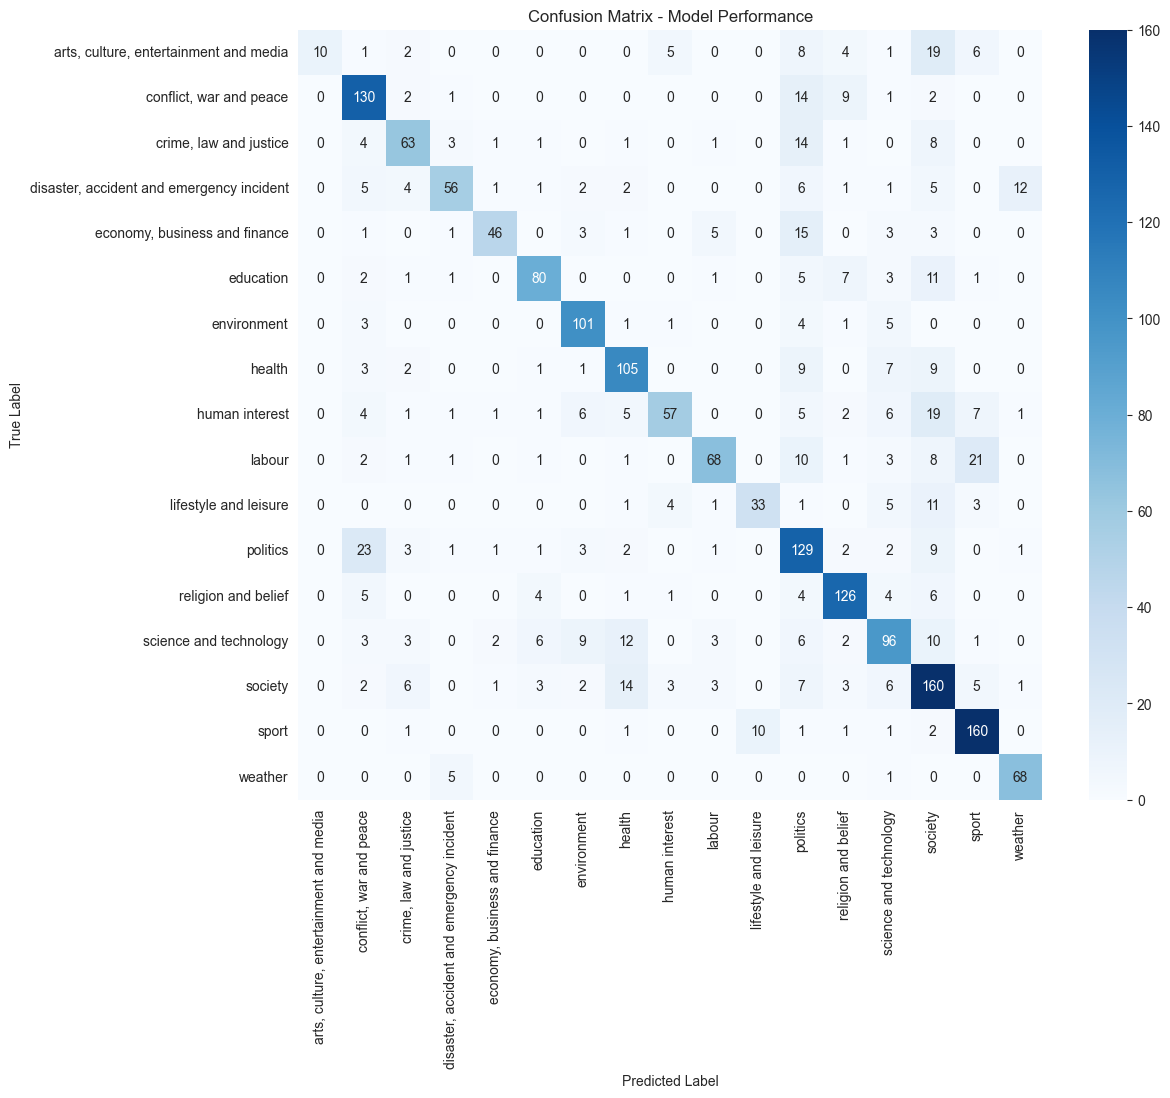

In [7]:
# 6. Visualize Confusion Matrix
plt.figure(figsize=(12, 10))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using Seaborn
sns.heatmap(
    cm,
    annot=True, # Set to True if you want numbers in cells (can get crowded)
    fmt='d',
    cmap='Blues',
    xticklabels=model_pipeline.classes_,
    yticklabels=model_pipeline.classes_
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Model Performance')
plt.xticks(rotation=90)
plt.show()

# Save the model:

In [8]:
joblib.dump(
    value=model_pipeline,
    filename='../models/news_classifier_model.joblib'
)

print(f"✅ Model saved !")

✅ Model saved !


# Conclusion and Future Improvements

In this project, we successfully built a text classification model to categorize news articles into 17 distinct topics.

**Key Results:**
* **Model Used:** Multinomial Naive Bayes with TF-IDF Vectorization.
* **Overall Accuracy:** ~71% on the test set.
* **Strong Performance:** The model performs exceptionally well on distinct categories like **Sport (90% precision)**, **Weather (92%)**, and **Environment (83%)**.
* **Challenges:** There is some confusion between semantically similar categories, such as **Society**, **Human Interest**, and **Arts**. This is expected due to the vocabulary overlap (e.g., an article about a celebrity could fit multiple categories).

**Future Work:**
To improve the model performance beyond 71%, we could:
1.  **Hyperparameter Tuning:** Optimize the `alpha` parameter of the Naive Bayes model.
2.  **Try Advanced Models:** Implement Support Vector Machines (SVM) or Random Forest, which might handle complex boundaries better.
3.  **Data Balancing:** Use techniques to handle class imbalance if certain categories remain underrepresented.